In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

import albumentations as A

import utils as ul

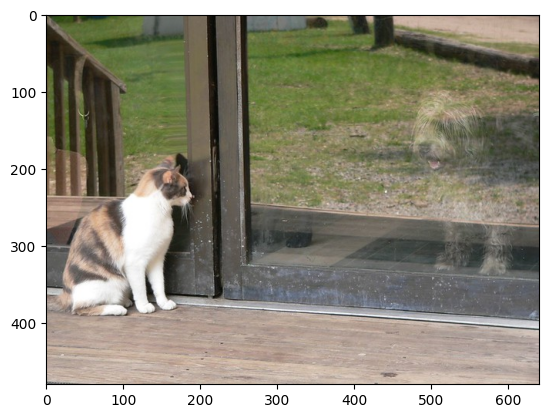

In [9]:
img = cv.imread('./images/cat.jpg')
bboxes = [
    [13, 170, 224, 410],
]

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

In [10]:
transform = A.Compose([
    A.Resize(width=1920, height=1080),
    A.RandomCrop(width=1280, height=720),
    A.Rotate(limit=40, p=.9, border_mode=cv.BORDER_CONSTANT),
    
    A.HorizontalFlip(p=.5),
    A.VerticalFlip(p=.1),

    A.RGBShift(
        r_shift_limit=25,
        g_shift_limit=25,
        b_shift_limit=25,

        p=.9
    ),

    A.OneOf([  # In 100% of cases one these transformations will be chosen
        A.Blur(blur_limit=3, p=.5),
        A.ColorJitter(p=.5)
    ], p=1.)
], bbox_params=A.BboxParams(
    format='pascal_voc', label_fields=[], min_area=2048, min_visibility=.3
))

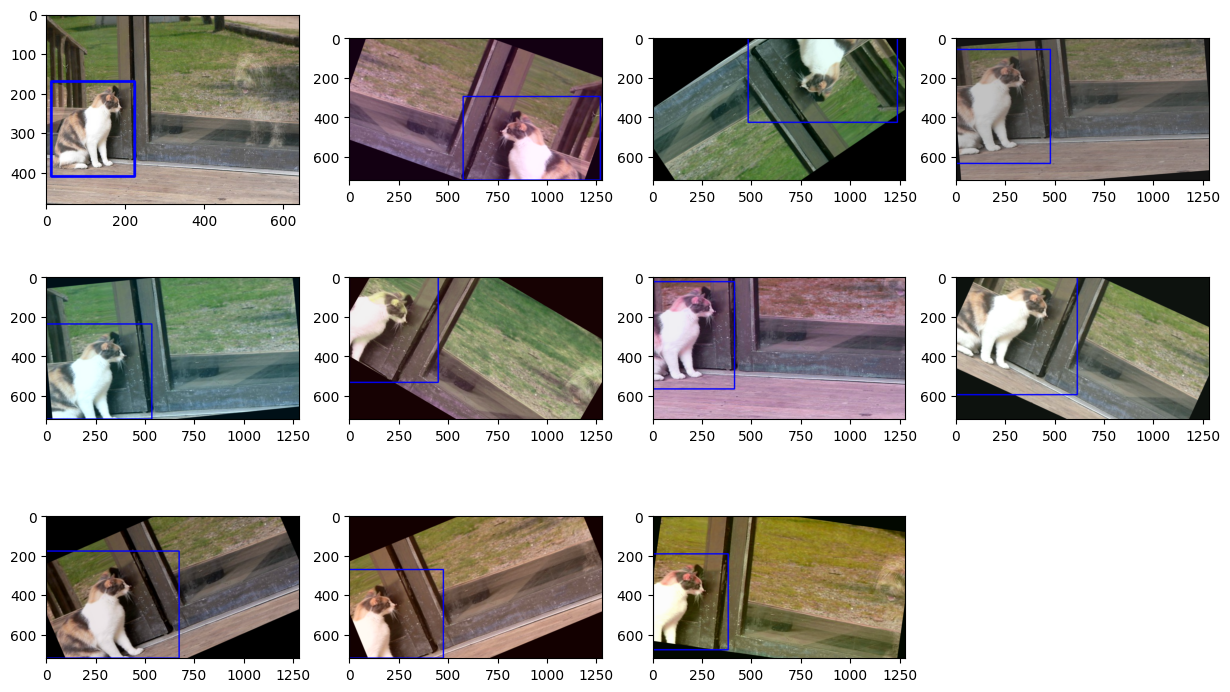

In [11]:
images_list = [img]
saved_bboxes = [bboxes[0]]

for _ in range(16):
    augmentations: dict = transform(image=img, bboxes=bboxes)
    
    if len(augmentations['bboxes']) > 0:
        augmented_img = augmentations['image']
        images_list.append(augmented_img)
        saved_bboxes.append(augmentations['bboxes'][0])

ul.plot_examples(images_list, convert_to_rgb=True, bboxes=saved_bboxes)